In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import pandas as pd

%matplotlib inline

In [16]:
NUM_ARMS = 200
NUM_ITERATIONS = 5000
environment = Env(rewards=np.random.randint(10, 20, NUM_ARMS), deviations=np.random.randint(1, 5, NUM_ARMS))

RANDOM AGENT
TOTAL REWARD : 74269.79329627585
TIME TAKEN (ms) : 208.078


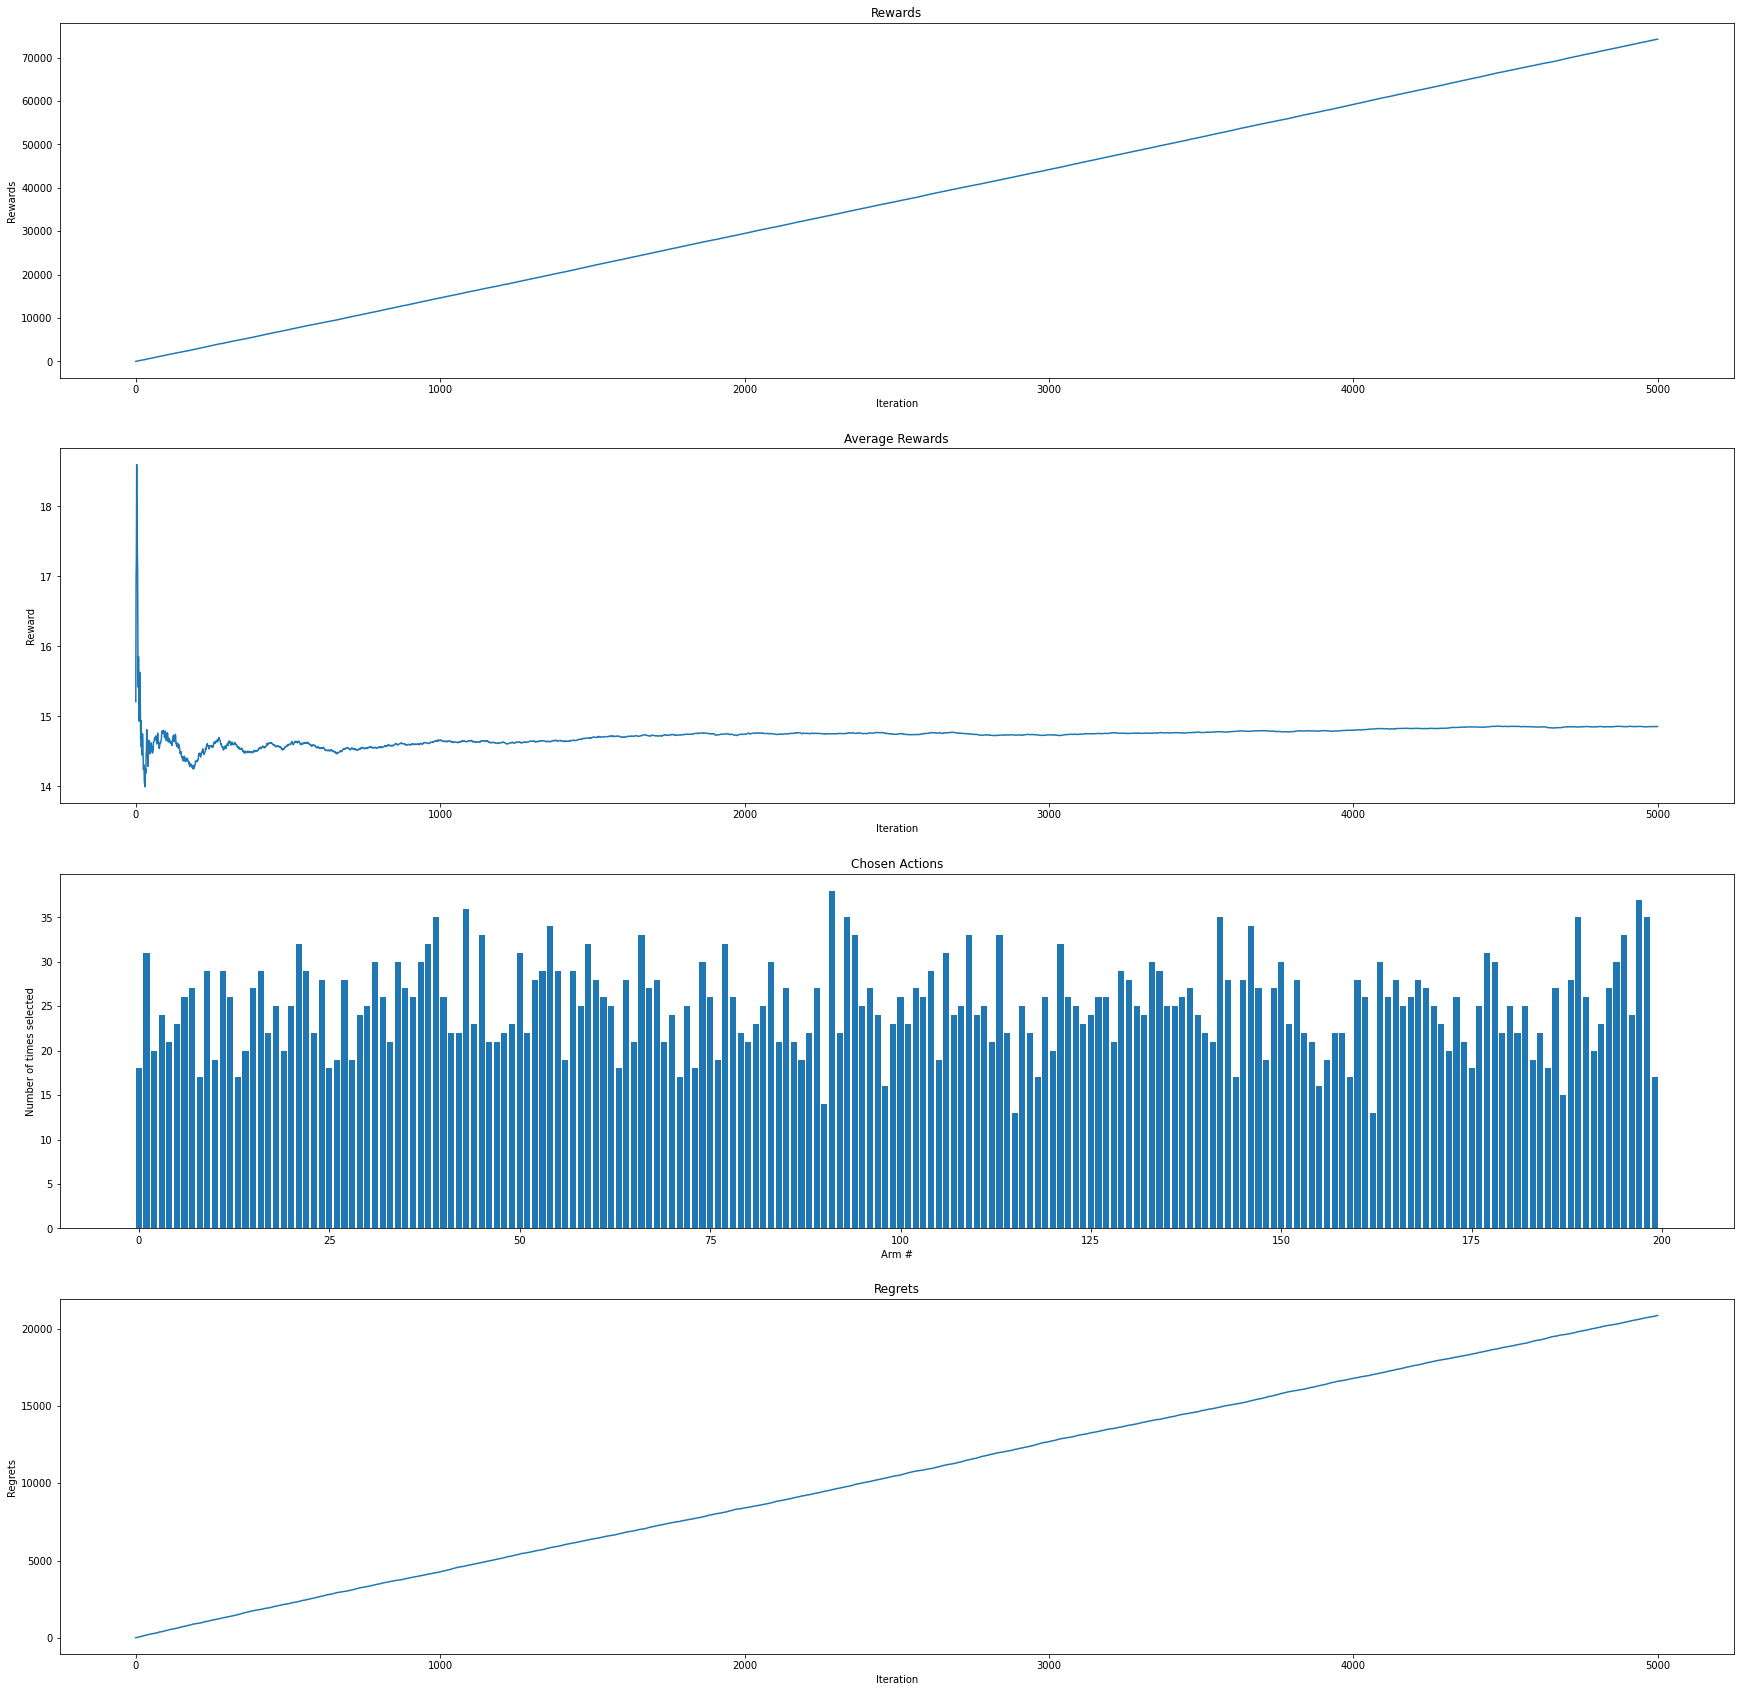

THOMPSON SAMPLING
TOTAL REWARD : 93558.9544168671
TIME TAKEN (ms) : 2576.3650000000002


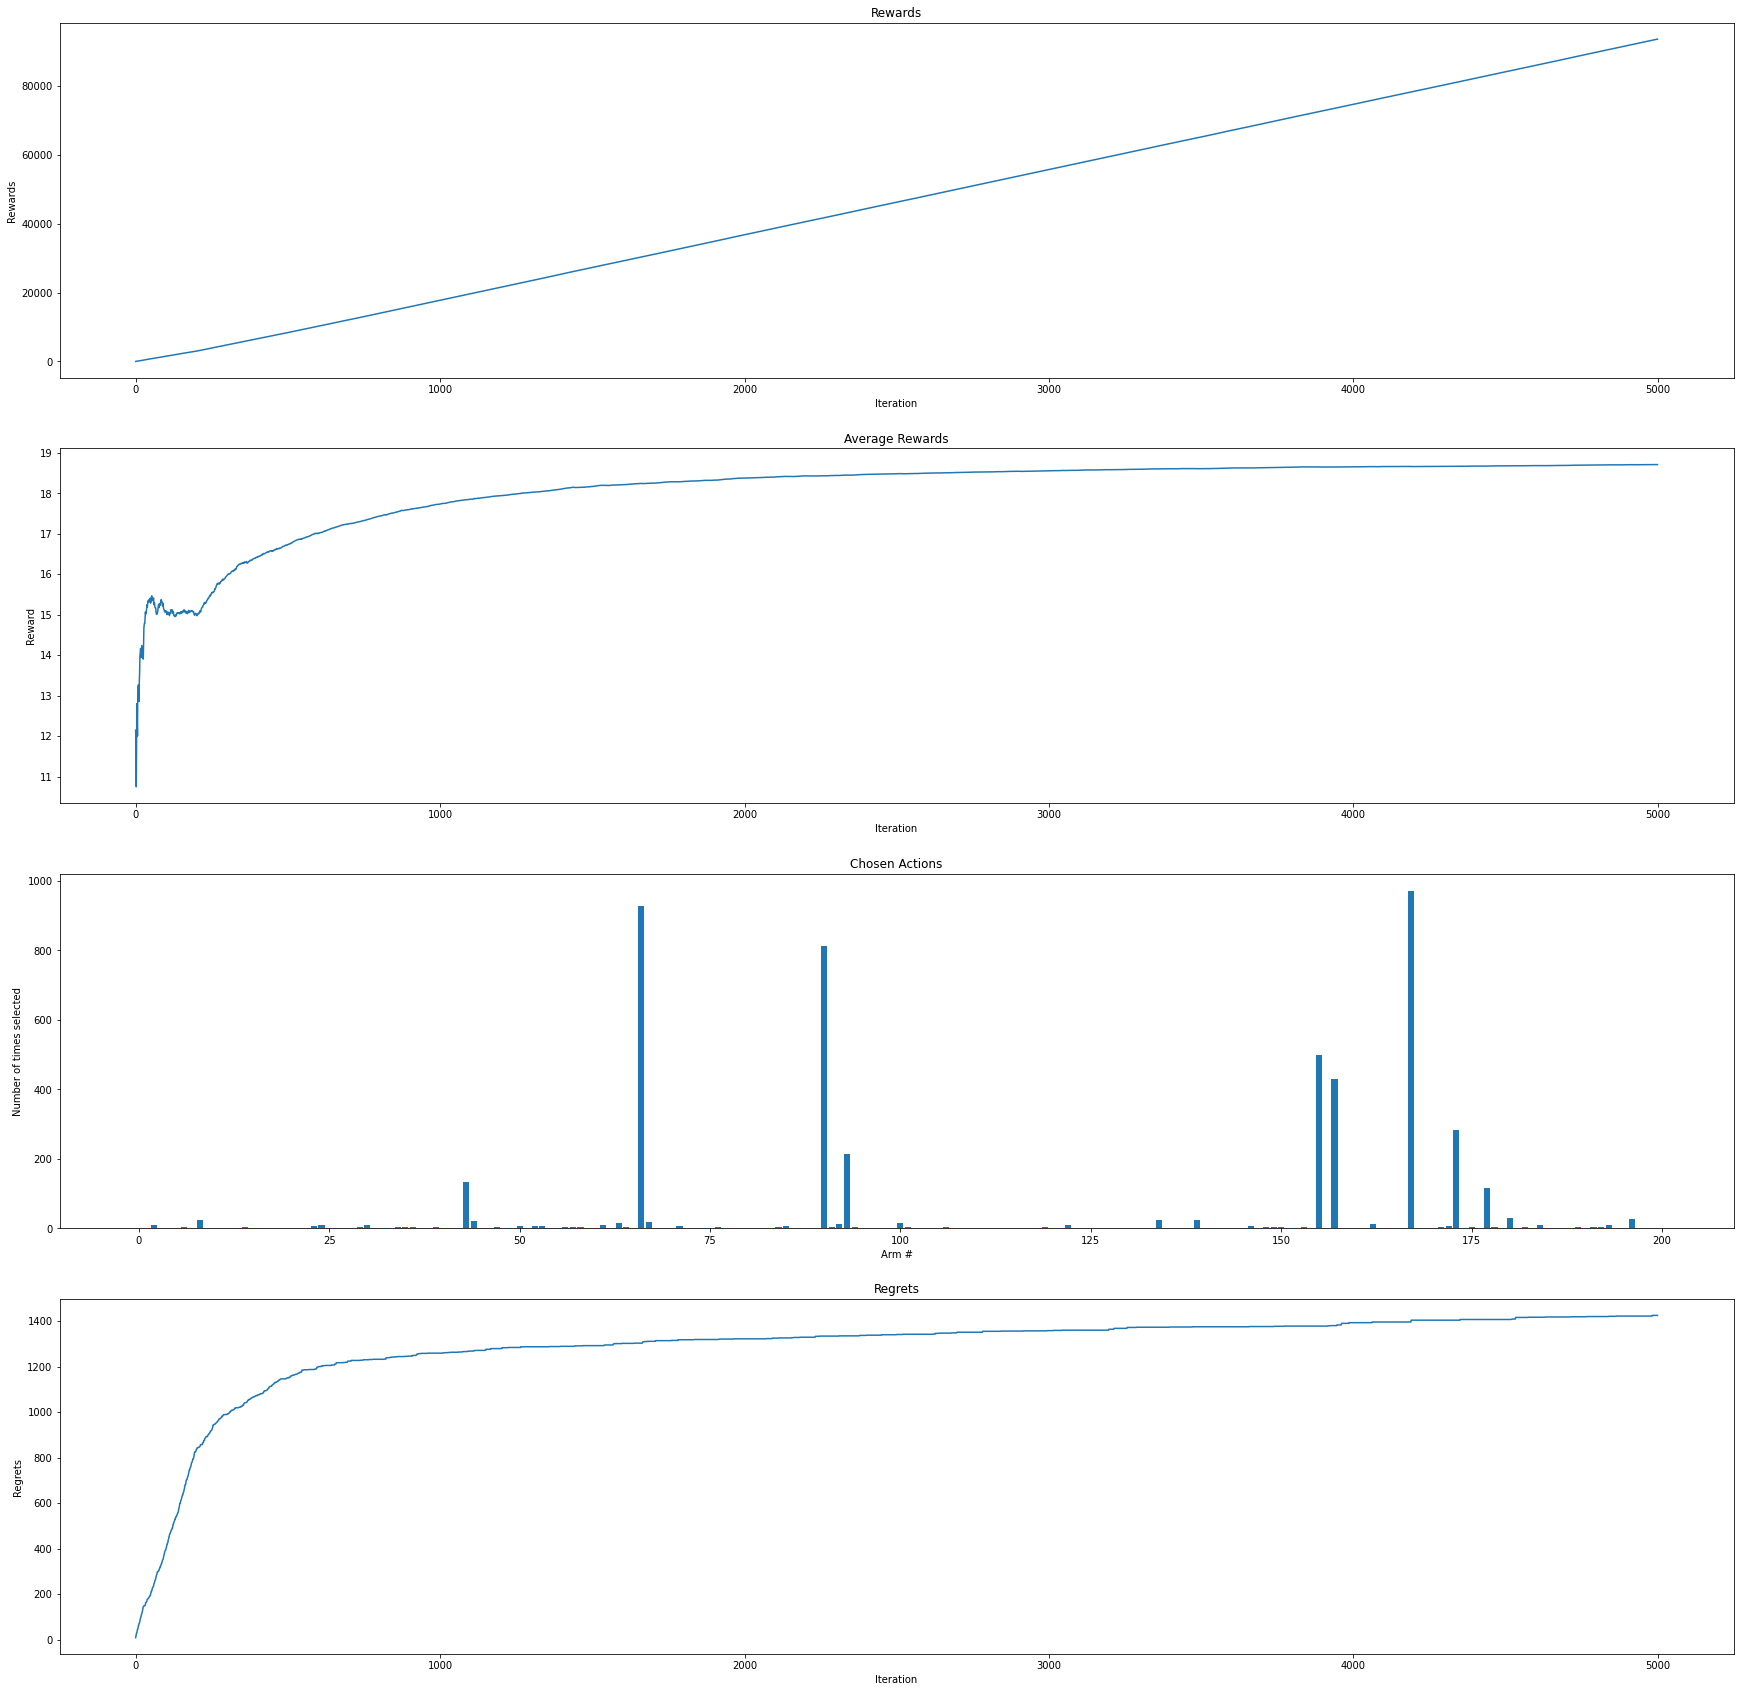

EPSILON GREEDY
TOTAL REWARD : 92692.91065214005
TIME TAKEN (ms) : 167.03


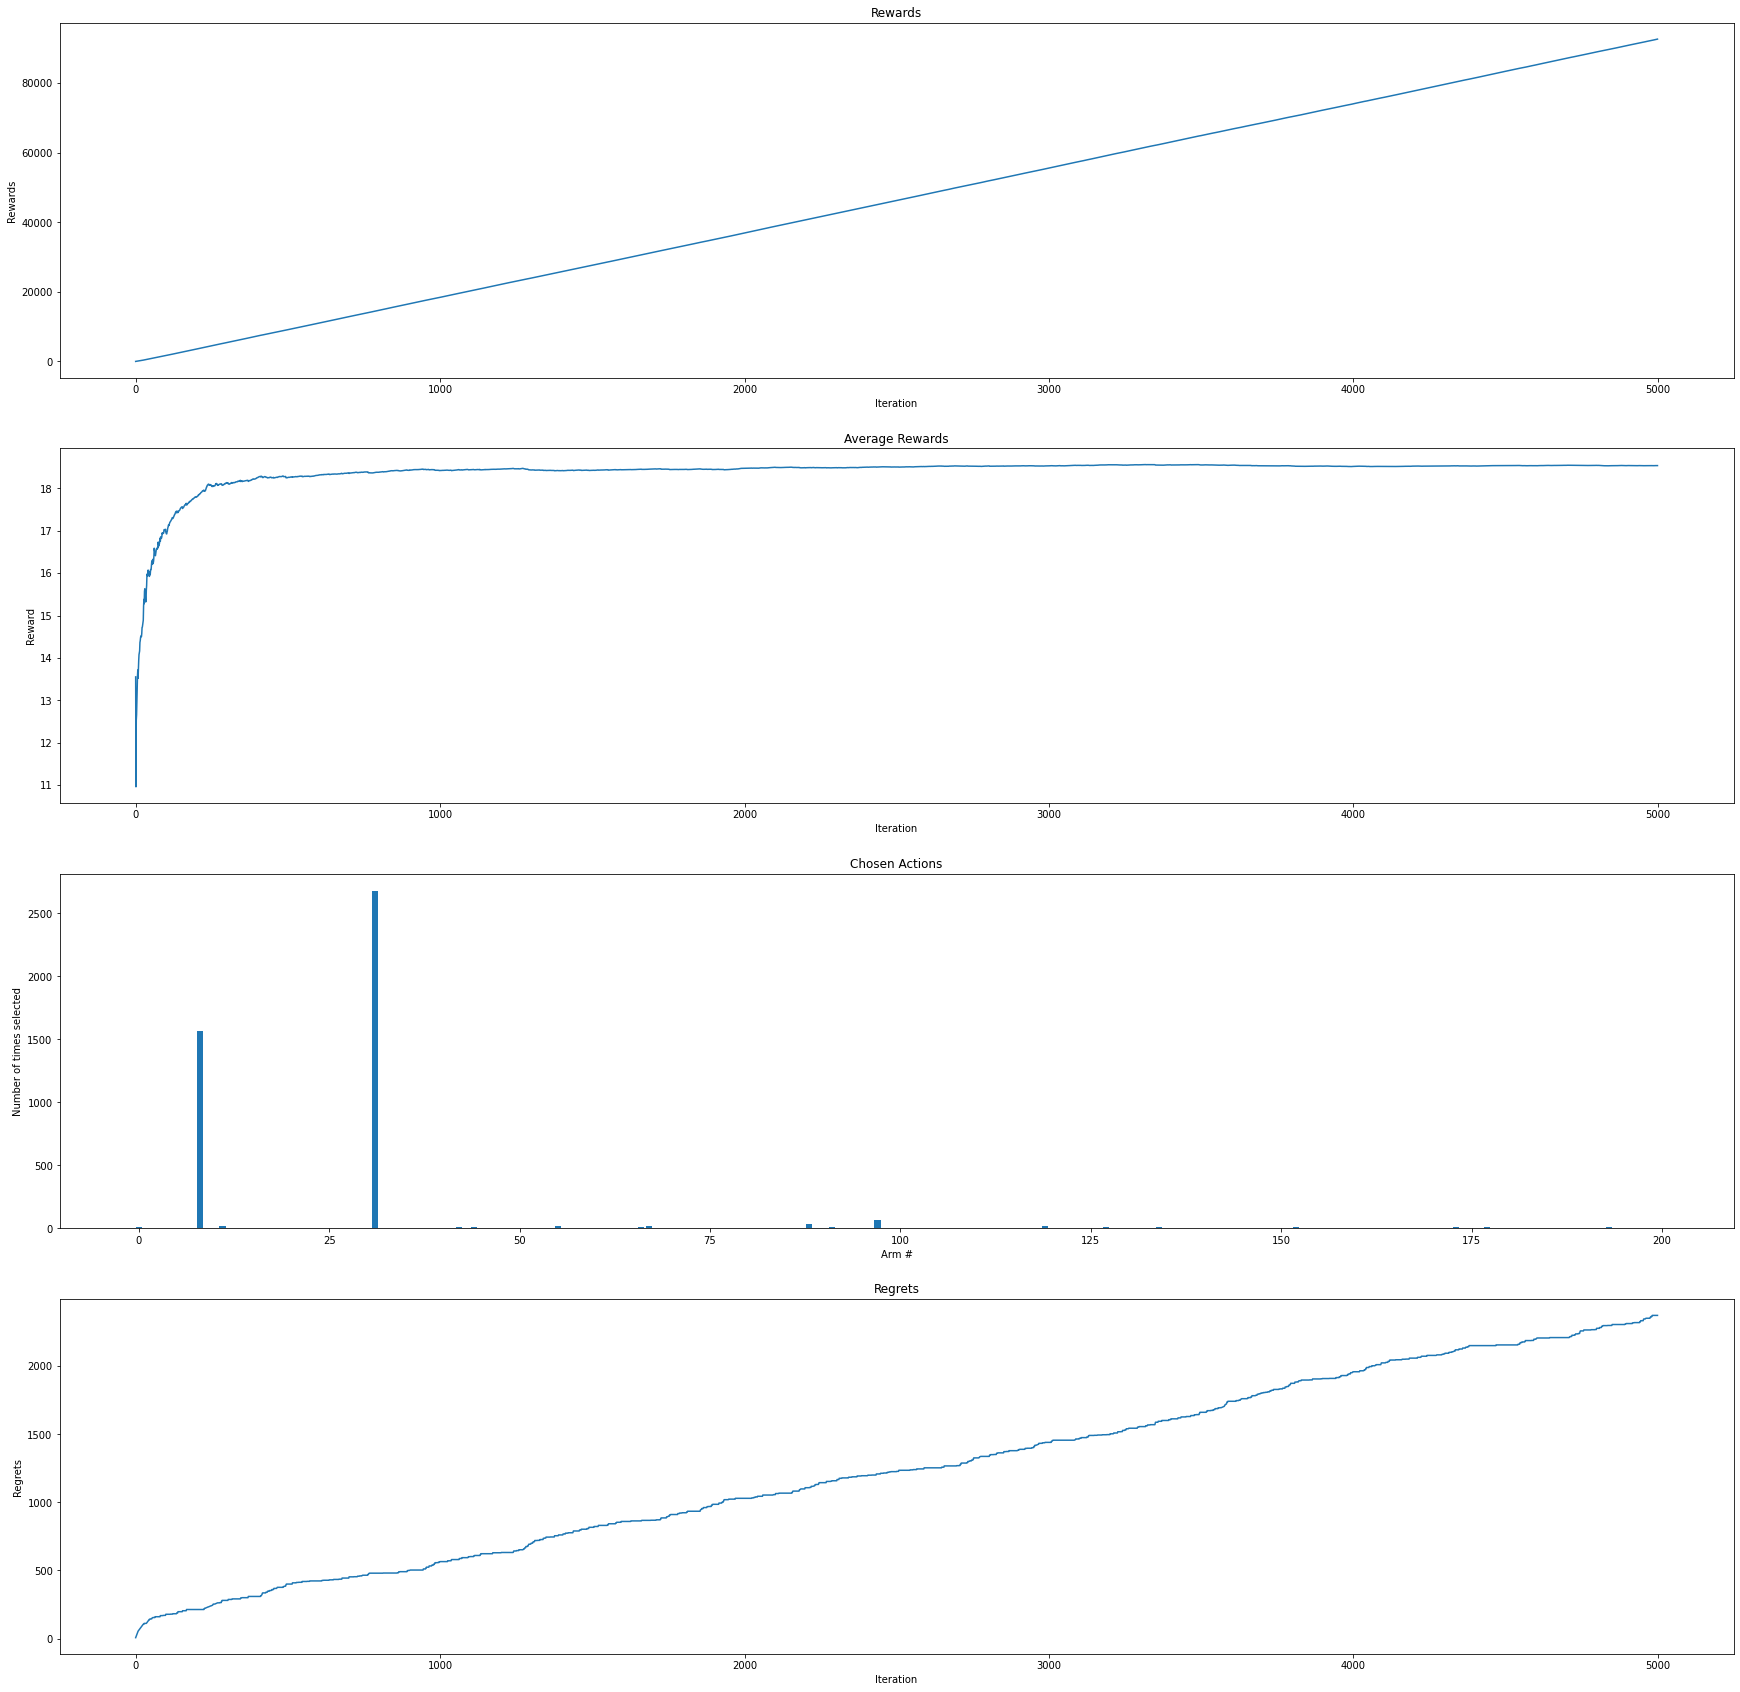

UCB AGENT
TOTAL REWARD : 94385.7979252789
TIME TAKEN (ms) : 2437.03


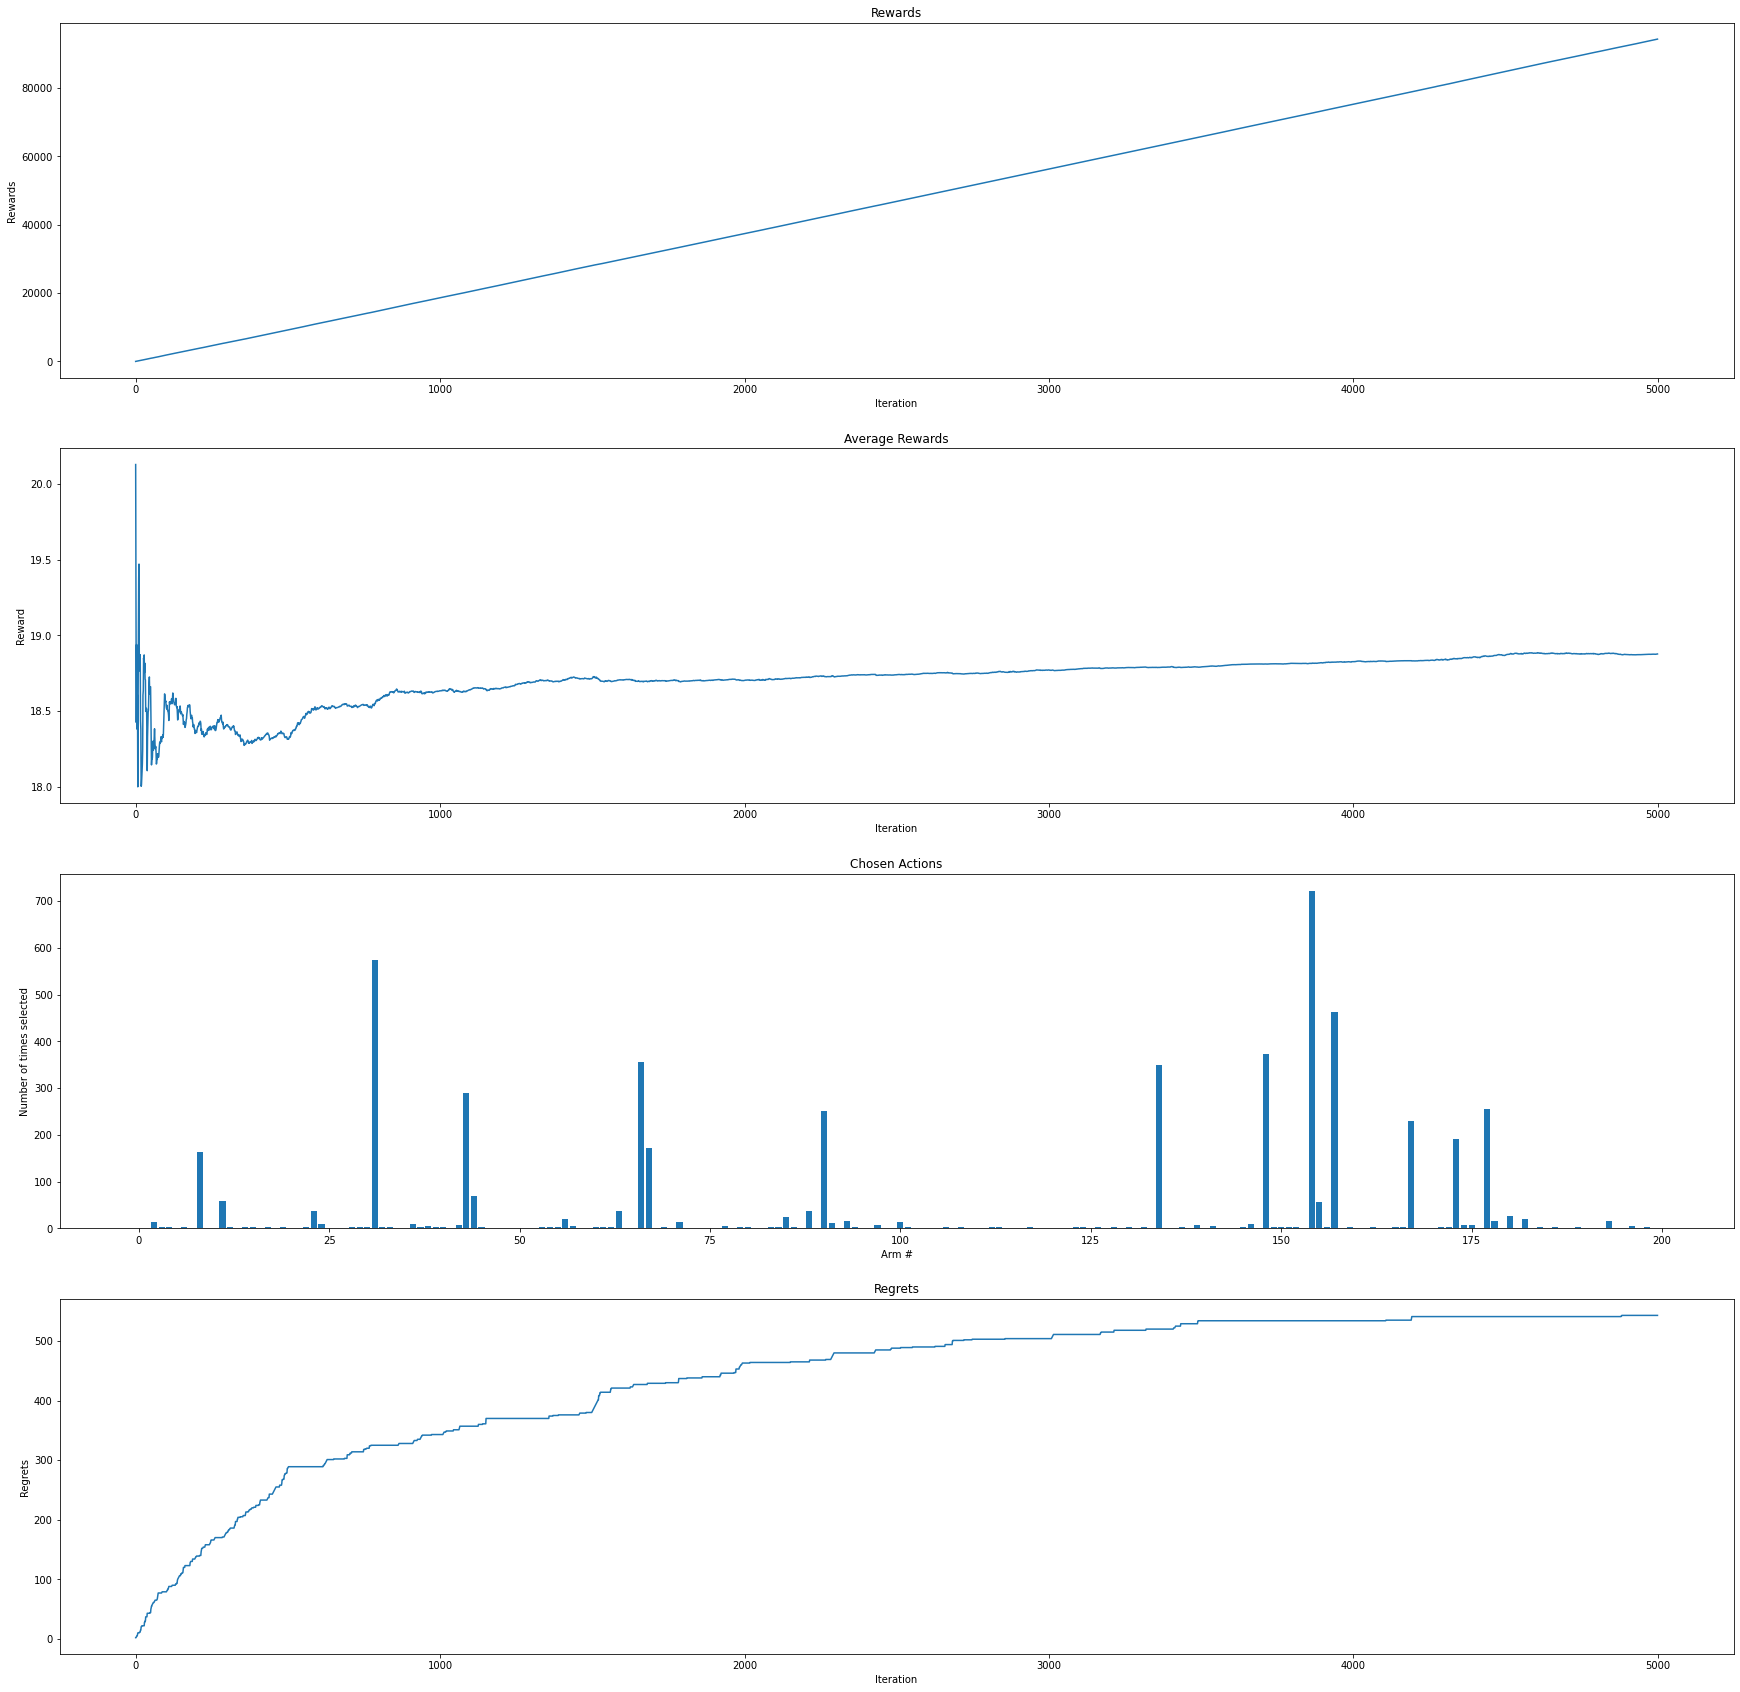

UCB_PC AGENT
TOTAL REWARD : 93767.22463189806
TIME TAKEN (ms) : 247.036


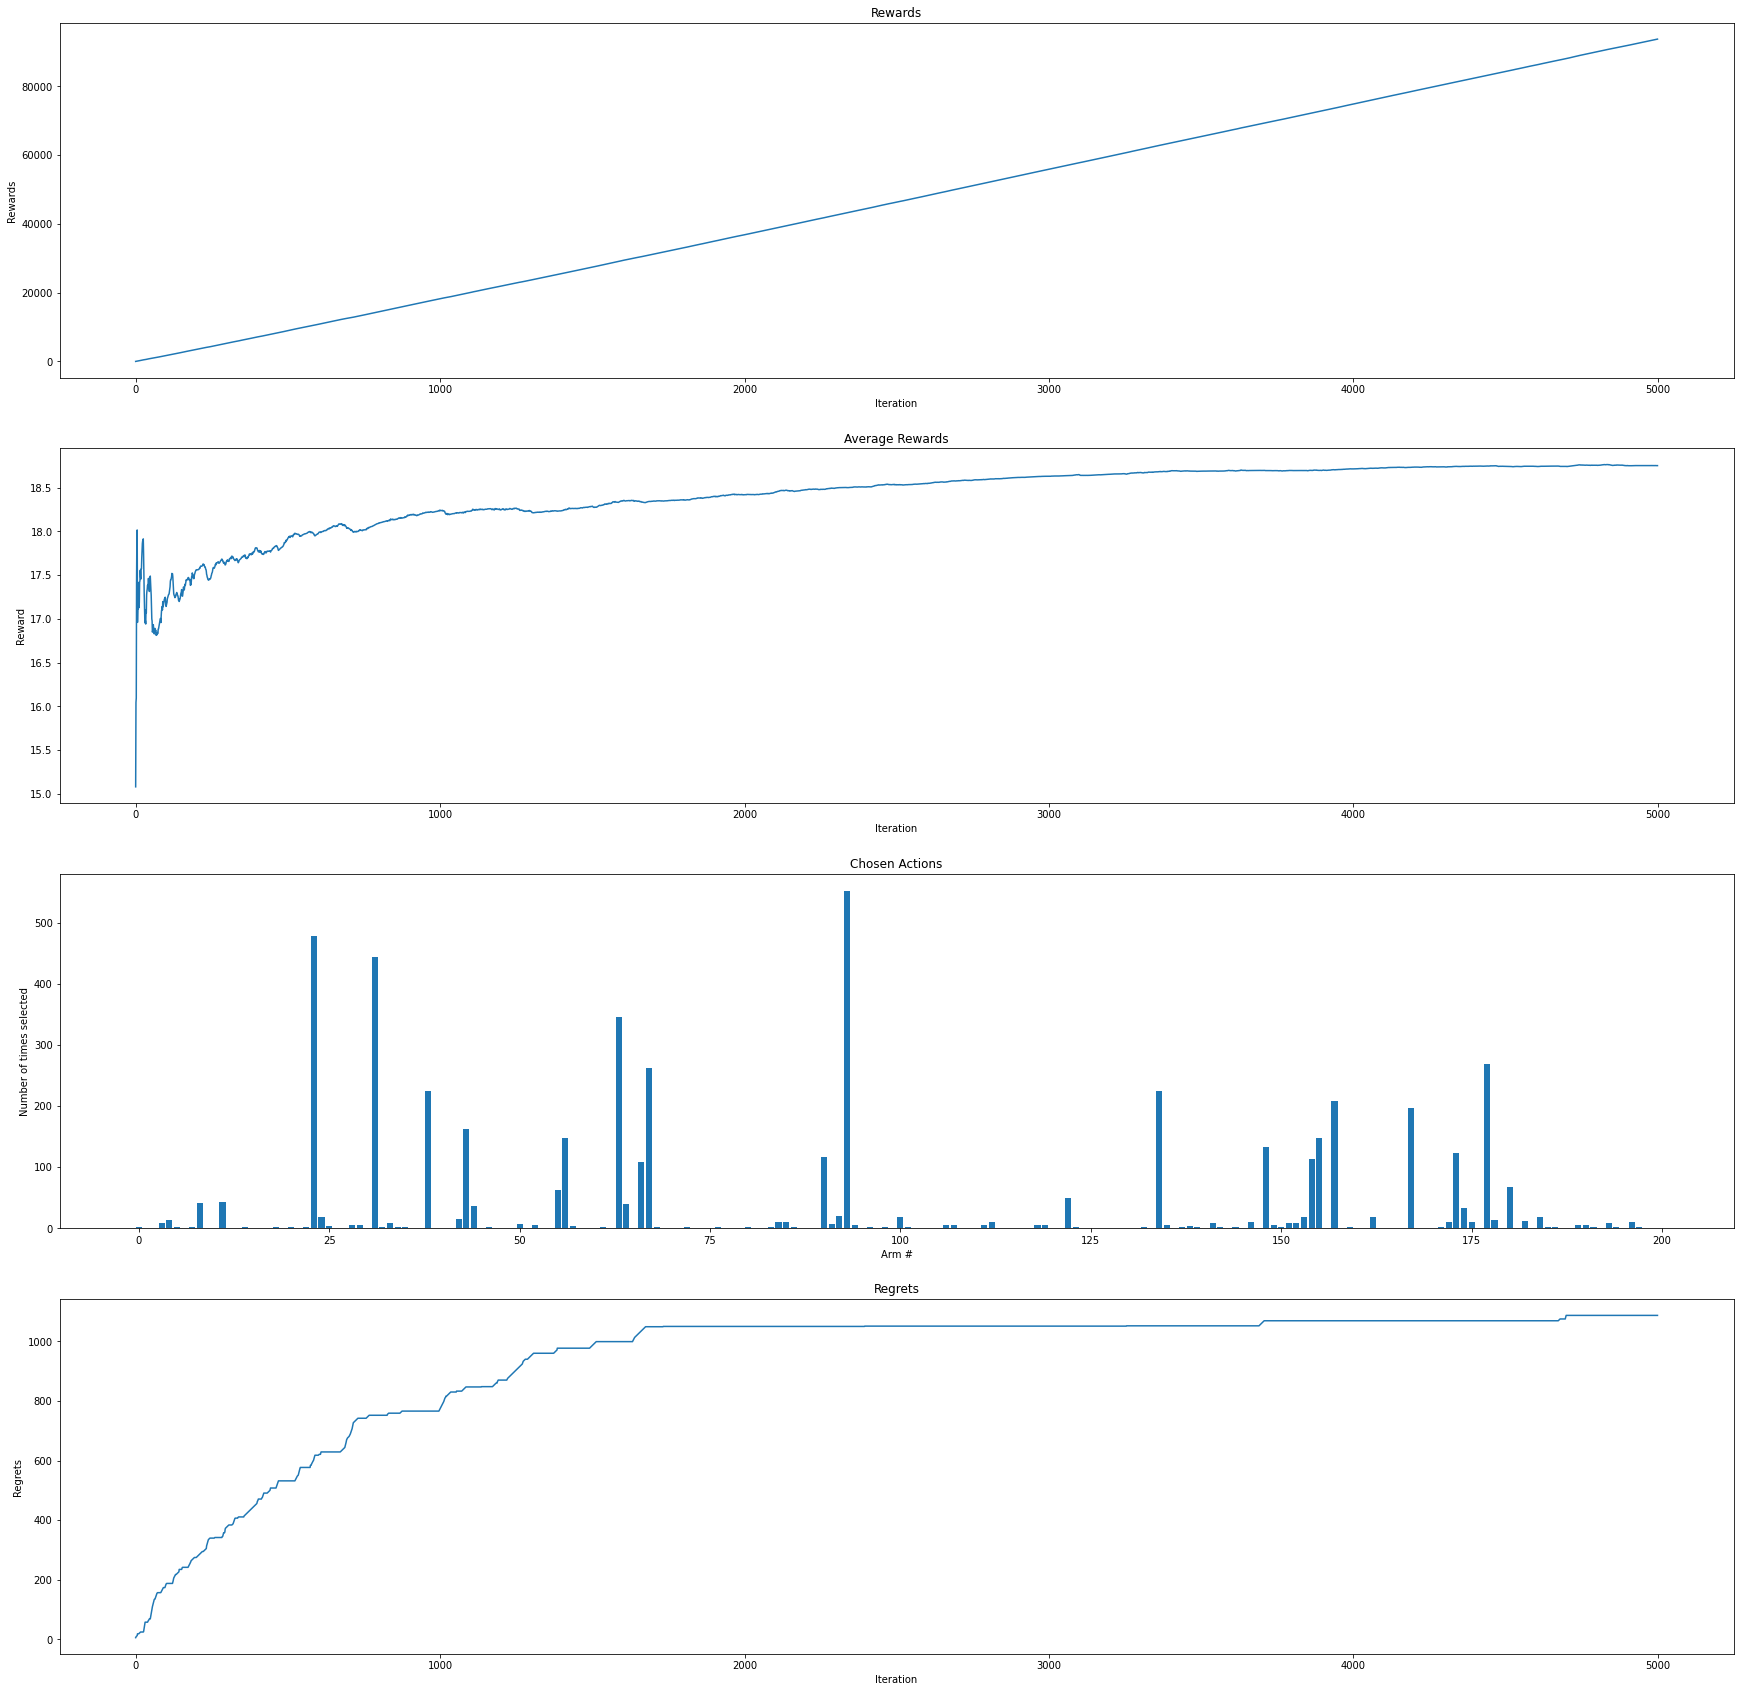

In [17]:
%run BanditLearning.ipynb

In [146]:
# Random Agent
def RA_run():
    random_agent = RandomAgent(env=environment, max_iterations=NUM_ITERATIONS)
    RA_history = random_agent.act()
    
    res = {"method": "RA", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(RA_history['rewards']), "time (ms)": RA_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(RA_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {RA_history['time']}")

    # plot_history(RA_history)

In [147]:
# Thompson Sampling
def TS_run():
    TS_history = TS_act(environment=environment, max_iterations=NUM_ITERATIONS)
    
    res = {"method": "TS", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(TS_history['rewards']), "time (ms)": TS_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(TS_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {TS_history['time']}")

    # plot_history(TS_history)

In [148]:
# Epsilon Greedy
def EG_run():
    epsilon_greedy_agent = EpsilonGreedyAgent(env=environment, max_iterations=NUM_ITERATIONS, epsilon=0.1)
    EG_history = epsilon_greedy_agent.act()
    
    res = {"method": "EG", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(EG_history['rewards']), "time (ms)": EG_history['time']}
    
    return res
    
    # print(f"TOTAL REWARD : {sum(EG_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {EG_history['time']}")

    # plot_history(EG_history)

In [149]:
# Upper Confidence Bound
def UCB_run():
    UCB_agent = UpperConfidenceBoundAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_history = UCB_agent.act()
    
    res = {"method": "UCB", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_history['rewards']), "time (ms)": UCB_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_history['time']}")

    # plot_history(UCB_history)

In [150]:
# UCB Pick and Compare
def UCB_PC_run():
    UCB_PC_agent = UCB_PickAndCompareAgent(env=environment, max_iterations=NUM_ITERATIONS)
    UCB_PC_history = UCB_PC_agent.act()
    
    res = {"method": "UCB_PC", "iterations": NUM_ITERATIONS, "arms (k)": NUM_ARMS,
           "reward": sum(UCB_PC_history['rewards']), "time (ms)": UCB_PC_history['time']}
    
    return res

    # print(f"TOTAL REWARD : {sum(UCB_PC_history['rewards'])}")
    # print(f"TIME TAKEN (ms) : {UCB_PC_history['time']}")

    # plot_history(UCB_PC_history)

In [151]:
results = pd.DataFrame()

In [152]:
results = results.append(RA_run(), ignore_index=True)
results = results.append(TS_run(), ignore_index=True)
results = results.append(EG_run(), ignore_index=True)
results = results.append(UCB_run(), ignore_index=True)
results = results.append(UCB_PC_run(), ignore_index=True)

In [153]:
results.head()

,method,iterations,arms (k),reward,time (ms)
0,RA,500.0,5.0,6885.914601,15.998
1,TS,500.0,5.0,9003.298273,16.032
2,EG,500.0,5.0,8717.917249,9.029
3,UCB,500.0,5.0,8995.681391,13.998
4,UCB_PC,500.0,5.0,8956.555415,16.040


In [154]:
arm_arr = [1, 10, 100, 1000, 5000, 10000]
iter_arr = [100, 500, 1000, 2000, 5000, 10000]

for i in range(len(arm_arr)):
    for j in range(len(iter_arr)):
        NUM_ARMS = arm_arr[i]
        NUM_ITERATIONS = iter_arr[j]
        
        environment = Env(rewards=np.random.randint(1, 25, NUM_ARMS), deviations=np.random.randint(1, 5, NUM_ARMS))
        
        #print(len(environment.rewards))
        results = results.append(RA_run(), ignore_index=True)
        results = results.append(TS_run(), ignore_index=True)
        results = results.append(EG_run(), ignore_index=True)
        results = results.append(UCB_run(), ignore_index=True)
        results = results.append(UCB_PC_run(), ignore_index=True)

In [158]:
results

,method,iterations,arms (k),reward,time (ms)
0,RA,500.0,5.0,6885.914601,15.998
1,TS,500.0,5.0,9003.298273,16.032
2,EG,500.0,5.0,8717.917249,9.029
3,UCB,500.0,5.0,8995.681391,13.998
4,UCB_PC,500.0,5.0,8956.555415,16.040
...,...,...,...,...,...
180,RA,10000.0,10000.0,124745.117736,1029.031
181,TS,10000.0,10000.0,123509.883787,244798.210
182,EG,10000.0,10000.0,227555.092708,994.030
183,UCB,10000.0,10000.0,232350.895124,232903.466


In [159]:
results.to_csv('bandit_data.csv')